# E7-PROJECT: Hotel Reservations

In [2]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv("Hotel Reservations.csv")
print(data.shape)
print(data.columns)

(36275, 19)
Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')


In [4]:
data.isna().value_counts()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  type_of_meal_plan  required_car_parking_space  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  repeated_guest  no_of_previous_cancellations  no_of_previous_bookings_not_canceled  avg_price_per_room  no_of_special_requests  booking_status
False       False         False           False                 False              False              False                       False               False      False         False          False         False                False           False                         False                                 False               False                   False             36275
Name: count, dtype: int64

# TODO list
1. One-hot-encoding, for example type_of_meal_plan

## Data Exploration

In [5]:
import plotnine as p9

In [6]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


### 14 numeric fields
#### no_of_adults
#### no_of_children
#### no_of_weekend_nights
#### no_of_week_nights 	
#### required_car_parking_space
#### arrival_year 	
#### arrival_month 	
#### arrival_date 	
#### repeated_guest 	
#### no_of_previous_cancellations 	
#### no_of_previous_bookings_not_canceled 	
#### no_of_special_requests
#### lead_time ----- (histogram)
#### avg_price_per_room ----- (histogram) 	

### 5 categorical
#### Booking_ID 
#### type_of_meal_plan, no or 1-3
#### room_type_reserved, 1-7
#### market_segment_type 
#### booking_status

In [32]:
# barplot function

def plot_a_barplot(x):
    plot = (p9.ggplot(
                data = data,
                mapping = p9.aes(x = x)
                 ) +
                p9.geom_bar() +
                p9.geom_text(
                    p9.aes(label = p9.after_stat('count')),
                        stat = 'count',
                        nudge_y = 0.1,
                        va = 'bottom'
                    ))
    return plot

In [103]:
# max / min date

def get_date_periods_by_field(field_name):
    
    date_periods = data.groupby(field_name)['Arrival_Date_Combined'].agg(
        **{
            'Start Date': 'min',
            'End Date': 'max'
        }
    )
    
    print(f"\n Date Period Analysis for: {field_name}")
    return date_periods

2
booking_status
Not_Canceled    1023
Canceled         308
Name: count, dtype: int64
2.59%

6
booking_status
Not_Canceled    829
Canceled        444
Name: count, dtype: int64
3.74%

28
booking_status
Not_Canceled    724
Canceled        405
Name: count, dtype: int64
3.41%

20
booking_status
Not_Canceled    868
Canceled        413
Name: count, dtype: int64
3.47%

11
booking_status
Not_Canceled    768
Canceled        330
Name: count, dtype: int64
2.78%

13
booking_status
Not_Canceled    950
Canceled        408
Name: count, dtype: int64
3.43%

15
booking_status
Not_Canceled    735
Canceled        538
Name: count, dtype: int64
4.53%

26
booking_status
Not_Canceled    721
Canceled        425
Name: count, dtype: int64
3.58%

18
booking_status
Not_Canceled    894
Canceled        366
Name: count, dtype: int64
3.08%

30
booking_status
Not_Canceled    751
Canceled        465
Name: count, dtype: int64
3.91%

5
booking_status
Not_Canceled    826
Canceled        328
Name: count, dtype: int64
2.76%



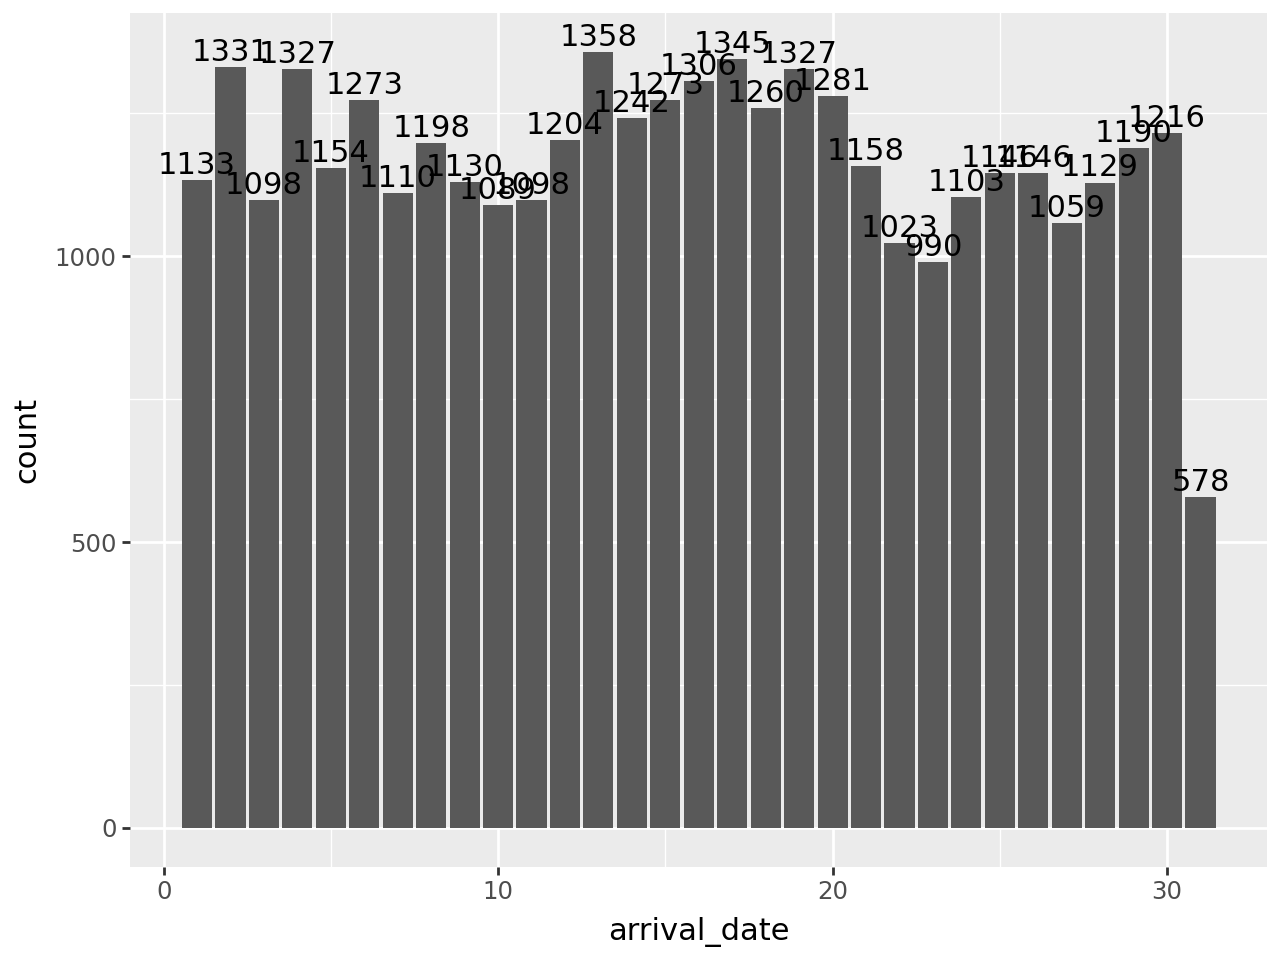

In [119]:
# PLOT + cancellation percentage for field values

# 5 categorical
#Booking_ID 
#type_of_meal_plan, no or 1-3
#room_type_reserved, 1-7
# market_segment_type 
#booking_status
cat = ["type_of_meal_plan", 
     "room_type_reserved",
     "market_segment_type",
     "booking_status"]

num = ["no_of_adults", "no_of_children", "no_of_weekend_nights",
       "no_of_week_nights", "required_car_parking_space",
       "arrival_year", "arrival_month", "arrival_date",
       "repeated_guest", "no_of_previous_cancellations",
       "no_of_previous_bookings_not_canceled", "no_of_special_requests"]

field = num[7] # cat[]

values = data[field].unique()
total_cancellations = (data["booking_status"] == "Canceled").sum()


for value in values:
    res = data[data[field] == value]["booking_status"].value_counts()
    num_canceled = res.get('Canceled', 0)
    canceled_perc = num_canceled / total_cancellations * 100
    print(value)
    print(res)
    print(f"{canceled_perc:.2f}%")
    print()

plot_a_barplot(field)

In [109]:
# Check time period of a value
# Maybe some values are new and have less instances

data['Arrival_Date_Combined'] = pd.to_datetime(
    data['arrival_year'].astype(str) + '-' +
    data['arrival_month'].astype(str) + '-' +
    data['arrival_date'].astype(str),
    errors='coerce' )

get_date_periods_by_field(field)


 Date Period Analysis for: market_segment_type


,Start Date,End Date
market_segment_type,,
Aviation,2018-02-15,2018-11-13
Complementary,2017-07-07,2018-12-29
Corporate,2017-07-27,2018-12-30
Offline,2017-07-01,2018-12-31
Online,2017-07-01,2018-12-31


C:\Users\rahnumat\AppData\Local\anaconda3\Lib\site-packages\plotnine\stats\stat_bin.py:112: PlotnineWarning: 'stat_bin()' using 'bins = 68'. Pick better value with 'binwidth'.


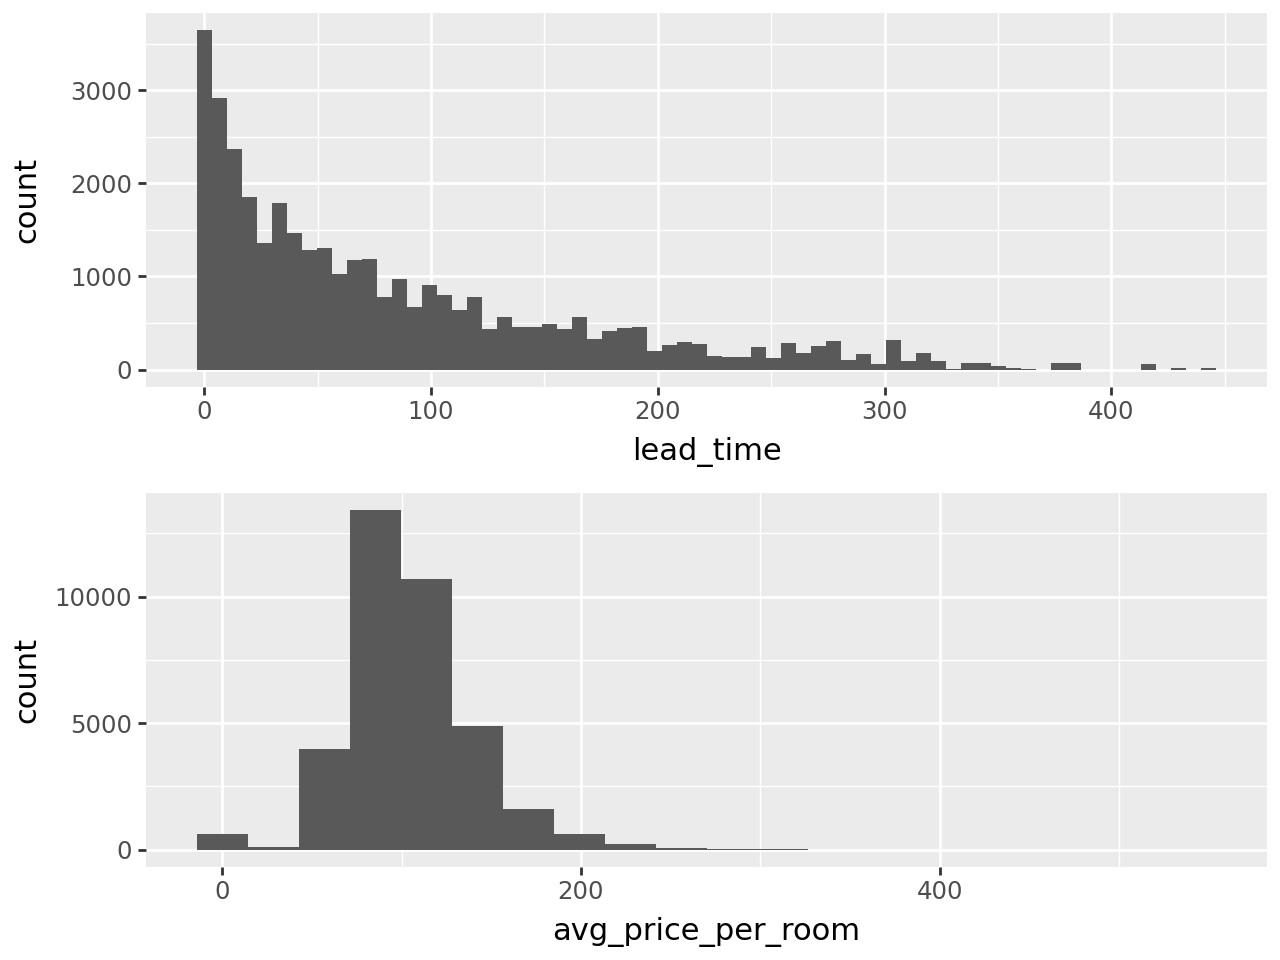

In [10]:
#HISTOGRAM

#lead_time, right skewed disrtibution
#avg_price_per_room

lead_time_histogram = (p9.ggplot(
                            data = data,
                            mapping = p9.aes(x = "lead_time")
                         ) +
                            p9.geom_histogram())#bins=20))
avg_price_per_room_histogram = (p9.ggplot(
                            data = data,
                            mapping = p9.aes(x = "avg_price_per_room")
                         ) +
                            p9.geom_histogram(bins=20))#bins=20))

(lead_time_histogram / avg_price_per_room_histogram)